# EasyOCR 결과 시각화

## readtext(width_ths=0.1, adjust_contrast=0.1)

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중
정확도 : 96.44%
경과 시간 : 2.85초

파일명 : 5350109-2001-0001-0002.jpg
인식 실행 중
정확도 : 84.35%
경과 시간 : 1.14초

파일명 : 5350109-2001-0001-0004.jpg
인식 실행 중
정확도 : 96.22%
경과 시간 : 2.02초

파일명 : 5350109-2001-0001-0005.jpg
인식 실행 중
정확도 : 95.25%
경과 시간 : 2.21초

파일명 : 5350109-2001-0001-0006.jpg
인식 실행 중
정확도 : 81.13%
경과 시간 : 1.03초

파일명 : 5350109-2001-0001-0009.jpg
인식 실행 중
정확도 : 96.73%
경과 시간 : 2.15초

파일명 : 5350109-2001-0001-0010.jpg
인식 실행 중
정확도 : 97.00%
경과 시간 : 2.03초

파일명 : 5350109-2001-0001-0015.jpg
인식 실행 중
정확도 : 95.68%
경과 시간 : 2.10초

파일명 : 5350109-2001-0001-0016.jpg
인식 실행 중
정확도 : 72.73%
경과 시간 : 0.69초

파일명 : 5350109-2001-0001-0017.jpg
인식 실행 중
정확도 : 94.14%
경과 시간 : 2.48초

파일명 : 5350109-2001-0001-0018.jpg
인식 실행 중
정확도 : 96.81%
경과 시간 : 2.24초

파일명 : 5350109-2001-0001-0019.jpg
인식 실행 중
정확도 : 73.86%
경과 시간 : 0.73초

파일명 : 5350109-2001-0001-0020.jpg
인식 실행 중
정확도 : 95.91%
경과 시간 : 2.92초

파일명 : 5350109-2001-0001-0021.jpg
인식 실행 중
정확도 : 95.32%
경과 시간 : 1.69초

파일명 : 5350109-2001-0001-0022.jpg
인

정확도 : 81.63%
경과 시간 : 1.06초

파일명 : 5350109-2001-0001-0466.jpg
인식 실행 중
정확도 : 96.57%
경과 시간 : 2.41초

파일명 : 5350109-2001-0001-0467.jpg
인식 실행 중
정확도 : 94.16%
경과 시간 : 2.55초

파일명 : 5350109-2001-0001-0468.jpg
인식 실행 중
정확도 : 96.65%
경과 시간 : 0.99초

파일명 : 5350109-2001-0001-0469.jpg
인식 실행 중
정확도 : 95.06%
경과 시간 : 2.04초

파일명 : 5350109-2001-0001-0470.jpg
인식 실행 중
정확도 : 95.89%
경과 시간 : 2.11초

파일명 : 5350109-2001-0001-0471.jpg
인식 실행 중
정확도 : 73.56%
경과 시간 : 0.67초

파일명 : 5350109-2001-0001-0472.jpg
인식 실행 중
정확도 : 94.88%
경과 시간 : 2.41초

파일명 : 5350109-2001-0001-0473.jpg
인식 실행 중
정확도 : 96.60%
경과 시간 : 1.06초

파일명 : 5350109-2001-0001-0479.jpg
인식 실행 중
정확도 : 94.32%
경과 시간 : 2.38초

파일명 : 5350109-2001-0001-0480.jpg
인식 실행 중
정확도 : 80.91%
경과 시간 : 0.97초

파일명 : 5350109-2001-0001-0481.jpg
인식 실행 중
정확도 : 96.35%
경과 시간 : 2.25초

파일명 : 5350109-2001-0001-0482.jpg
인식 실행 중
정확도 : 96.53%
경과 시간 : 2.19초

파일명 : 5350109-2001-0001-0483.jpg
인식 실행 중
정확도 : 73.86%
경과 시간 : 0.68초

파일명 : 5350109-2001-0001-0484.jpg
인식 실행 중
정확도 : 97.10%
경과 시간 : 2.05초

파일명 : 

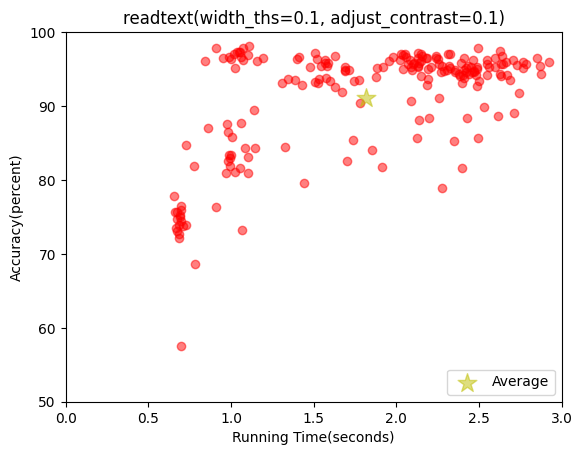

In [4]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0

'''
# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1
'''


# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.readtext(folder_path_source+"/"+filename_split+".jpg", width_ths=0.1, adjust_contrast=0.1)
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    '''
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 인식 결과>")
    print(result)
    
    print("")
    print("<EasyOCR 좌표 값 인덱싱>")
    # 좌표 값만 출력 (인덱싱)
    for i in result:
        print(i[0])
    '''
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        '''
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
        '''
        
    # 인식 결과값과 라벨링 데이터 값 추출
    result_texts = {i[1] for i in result}
    json_test_texts = {k['annotation.text'] for k in json_test}
    
    result_list = []
    json_test_list = []
    matching_texts = []
        
    # 인식한 문자를 한 글자씩 분리
    for text_result in sorted(result_texts):
        result_list.extend(list(text_result))
    for text_json in sorted(json_test_texts):
        json_test_list.extend(list(text_json))
        
    '''
    # 분리 결과 출력
    print("")
    print("<인식한 문자 분리 결과>")
    print(result_list)
    print("[분리한 인식 문자] : 총 "+str(len(result_list))+"개")
    print("")
    print("<라벨링 문자 분리 결과>")
    print(json_test_list)
    print("[분리한 라벨링 문자] : 총 "+str(len(json_test_list))+"개")
    '''
    
    # 한 글자씩 비교하여 일치하는 값을 matching_texts 리스트에 저장
    for item in result_list:
        if item in json_test_list:
            matching_texts.append(item)
        
    '''
    # 일치 문자 출력
    print("")
    print("<일치 문자 결과>")
    print(matching_texts)
    print("[일치한 문자] : 총 "+str(len(matching_texts))+"개")
    print("")
    '''

    # 정확도 계산
    percentage = (len(matching_texts) / len(result_list)) * 100
    
    # 정확도, 경과 시간 출력
    if matching_texts:
        print("정확도 : {:.2f}%".format(percentage))
        print("경과 시간 : {:.2f}초".format(elapsed_time))
        total_accuracy += percentage
    else:
        print("정확한 인식 값이 없습니다.")
            
    print("")
    
    '''
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    for i in result :
        # 이미지 좌표 변수 지정
        x = i[0][0][0] 
        y = i[0][0][1] 
        w = i[0][1][0] - i[0][0][0] 
        h = i[0][2][1] - i[0][1][1]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    
    img.save('ResultImage_readtext/'+filename_split+'_result(readtext).jpg')  # JPG 형식으로 저장
    '''
    
    plt.scatter(x=[elapsed_time], y=[percentage], c='r',alpha=0.5, marker='o')

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))
print("평균 정확도 : {:.2f}%".format(average_accuracy))

plt.scatter(x=[average_elapsed_time], y=[average_accuracy], s=200, c='y',alpha=0.5, marker='*', label='Average')
plt.title('readtext(width_ths=0.1, adjust_contrast=0.1)')
plt.xlabel('Running Time(seconds)')
plt.ylabel('Accuracy(percent)')
plt.xlim(0, 3)
plt.ylim(50, 100)
plt.legend(loc='lower right')
plt.show()

## reader.readtext(text_threshold=0.1, width_ths=0.1)

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중
정확도 : 96.09%
경과 시간 : 2.94초

파일명 : 5350109-2001-0001-0002.jpg
인식 실행 중
정확도 : 83.98%
경과 시간 : 1.11초

파일명 : 5350109-2001-0001-0004.jpg
인식 실행 중
정확도 : 95.52%
경과 시간 : 2.20초

파일명 : 5350109-2001-0001-0005.jpg
인식 실행 중
정확도 : 95.10%
경과 시간 : 2.23초

파일명 : 5350109-2001-0001-0006.jpg
인식 실행 중
정확도 : 81.22%
경과 시간 : 0.99초

파일명 : 5350109-2001-0001-0009.jpg
인식 실행 중
정확도 : 96.56%
경과 시간 : 2.11초

파일명 : 5350109-2001-0001-0010.jpg
인식 실행 중
정확도 : 96.80%
경과 시간 : 2.01초

파일명 : 5350109-2001-0001-0015.jpg
인식 실행 중
정확도 : 94.83%
경과 시간 : 2.24초

파일명 : 5350109-2001-0001-0016.jpg
인식 실행 중
정확도 : 71.91%
경과 시간 : 0.76초

파일명 : 5350109-2001-0001-0017.jpg
인식 실행 중
정확도 : 94.18%
경과 시간 : 2.52초

파일명 : 5350109-2001-0001-0018.jpg
인식 실행 중
정확도 : 96.65%
경과 시간 : 2.31초

파일명 : 5350109-2001-0001-0019.jpg
인식 실행 중
정확도 : 73.03%
경과 시간 : 0.74초

파일명 : 5350109-2001-0001-0020.jpg
인식 실행 중
정확도 : 95.80%
경과 시간 : 3.21초

파일명 : 5350109-2001-0001-0021.jpg
인식 실행 중
정확도 : 94.85%
경과 시간 : 1.78초

파일명 : 5350109-2001-0001-0022.jpg
인

정확도 : 81.63%
경과 시간 : 1.08초

파일명 : 5350109-2001-0001-0466.jpg
인식 실행 중
정확도 : 96.59%
경과 시간 : 2.46초

파일명 : 5350109-2001-0001-0467.jpg
인식 실행 중
정확도 : 94.18%
경과 시간 : 2.55초

파일명 : 5350109-2001-0001-0468.jpg
인식 실행 중
정확도 : 96.65%
경과 시간 : 1.01초

파일명 : 5350109-2001-0001-0469.jpg
인식 실행 중
정확도 : 94.80%
경과 시간 : 2.17초

파일명 : 5350109-2001-0001-0470.jpg
인식 실행 중
정확도 : 95.44%
경과 시간 : 2.20초

파일명 : 5350109-2001-0001-0471.jpg
인식 실행 중
정확도 : 71.91%
경과 시간 : 0.67초

파일명 : 5350109-2001-0001-0472.jpg
인식 실행 중
정확도 : 94.90%
경과 시간 : 2.40초

파일명 : 5350109-2001-0001-0473.jpg
인식 실행 중
정확도 : 96.24%
경과 시간 : 1.09초

파일명 : 5350109-2001-0001-0479.jpg
인식 실행 중
정확도 : 94.23%
경과 시간 : 2.50초

파일명 : 5350109-2001-0001-0480.jpg
인식 실행 중
정확도 : 80.66%
경과 시간 : 1.02초

파일명 : 5350109-2001-0001-0481.jpg
인식 실행 중
정확도 : 96.22%
경과 시간 : 2.34초

파일명 : 5350109-2001-0001-0482.jpg
인식 실행 중
정확도 : 96.22%
경과 시간 : 2.25초

파일명 : 5350109-2001-0001-0483.jpg
인식 실행 중
정확도 : 73.86%
경과 시간 : 0.70초

파일명 : 5350109-2001-0001-0484.jpg
인식 실행 중
정확도 : 96.73%
경과 시간 : 2.08초

파일명 : 

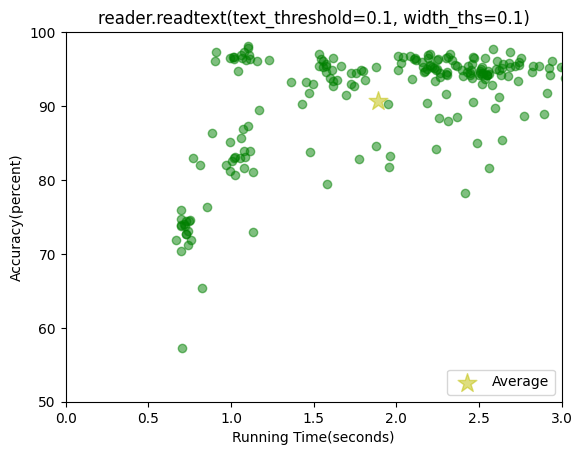

In [5]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0

'''
# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1
'''

# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.readtext(folder_path_source+"/"+filename_split+".jpg", text_threshold=0.1, width_ths=0.1)
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    '''
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 인식 결과>")
    print(result)
    
    print("")
    print("<EasyOCR 좌표 값 인덱싱>")
    # 좌표 값만 출력 (인덱싱)
    for i in result:
        print(i[0])
    '''
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        '''
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
        '''
        
    # 인식 결과값과 라벨링 데이터 값 추출
    result_texts = {i[1] for i in result}
    json_test_texts = {k['annotation.text'] for k in json_test}
    
    result_list = []
    json_test_list = []
    matching_texts = []
        
    # 인식한 문자를 한 글자씩 분리
    for text_result in sorted(result_texts):
        result_list.extend(list(text_result))
    for text_json in sorted(json_test_texts):
        json_test_list.extend(list(text_json))
        
    '''
    # 분리 결과 출력
    print("")
    print("<인식한 문자 분리 결과>")
    print(result_list)
    print("[분리한 인식 문자] : 총 "+str(len(result_list))+"개")
    print("")
    print("<라벨링 문자 분리 결과>")
    print(json_test_list)
    print("[분리한 라벨링 문자] : 총 "+str(len(json_test_list))+"개")
    '''
    
    # 한 글자씩 비교하여 일치하는 값을 matching_texts 리스트에 저장
    for item in result_list:
        if item in json_test_list:
            matching_texts.append(item)
        
    '''
    # 일치 문자 출력
    print("")
    print("<일치 문자 결과>")
    print(matching_texts)
    print("[일치한 문자] : 총 "+str(len(matching_texts))+"개")
    print("")
    '''

    # 정확도 계산
    percentage = (len(matching_texts) / len(result_list)) * 100
    
    # 정확도, 경과 시간 출력
    if matching_texts:
        print("정확도 : {:.2f}%".format(percentage))
        print("경과 시간 : {:.2f}초".format(elapsed_time))
        total_accuracy += percentage
    else:
        print("정확한 인식 값이 없습니다.")
            
    print("")
    
    '''
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    for i in result :
        # 이미지 좌표 변수 지정
        x = i[0][0][0] 
        y = i[0][0][1] 
        w = i[0][1][0] - i[0][0][0] 
        h = i[0][2][1] - i[0][1][1]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    
    img.save('ResultImage_readtext/'+filename_split+'_result(readtext).jpg')  # JPG 형식으로 저장
    '''
    
    plt.scatter(x=[elapsed_time], y=[percentage], c='g',alpha=0.5, marker='o')

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))
print("평균 정확도 : {:.2f}%".format(average_accuracy))

plt.scatter(x=[average_elapsed_time], y=[average_accuracy], s=200, c='y',alpha=0.5, marker='*', label='Average')
plt.title('reader.readtext(text_threshold=0.1, width_ths=0.1)')
plt.xlabel('Running Time(seconds)')
plt.ylabel('Accuracy(percent)')
plt.xlim(0, 3)
plt.ylim(50, 100)
plt.legend(loc='lower right')
plt.show()

## reader.readtext(text_threshold=0.1, width_ths=0.5, height_ths=0.5, low_text=0.1)

파일명 : 5350109-2001-0001-0001.jpg
인식 실행 중
정확도 : 89.38%
경과 시간 : 2.02초

파일명 : 5350109-2001-0001-0002.jpg
인식 실행 중
정확도 : 63.77%
경과 시간 : 0.92초

파일명 : 5350109-2001-0001-0004.jpg
인식 실행 중
정확도 : 92.24%
경과 시간 : 1.63초

파일명 : 5350109-2001-0001-0005.jpg
인식 실행 중
정확도 : 92.90%
경과 시간 : 1.77초

파일명 : 5350109-2001-0001-0006.jpg
인식 실행 중
정확도 : 70.66%
경과 시간 : 0.85초

파일명 : 5350109-2001-0001-0009.jpg
인식 실행 중
정확도 : 90.43%
경과 시간 : 1.56초

파일명 : 5350109-2001-0001-0010.jpg
인식 실행 중
정확도 : 90.55%
경과 시간 : 1.51초

파일명 : 5350109-2001-0001-0015.jpg
인식 실행 중
정확도 : 89.79%
경과 시간 : 1.67초

파일명 : 5350109-2001-0001-0016.jpg
인식 실행 중
정확도 : 68.75%
경과 시간 : 0.67초

파일명 : 5350109-2001-0001-0017.jpg
인식 실행 중
정확도 : 86.56%
경과 시간 : 1.73초

파일명 : 5350109-2001-0001-0018.jpg
인식 실행 중
정확도 : 88.12%
경과 시간 : 1.67초

파일명 : 5350109-2001-0001-0019.jpg
인식 실행 중
정확도 : 68.09%
경과 시간 : 0.67초

파일명 : 5350109-2001-0001-0020.jpg
인식 실행 중
정확도 : 95.34%
경과 시간 : 2.28초

파일명 : 5350109-2001-0001-0021.jpg
인식 실행 중
정확도 : 96.01%
경과 시간 : 1.38초

파일명 : 5350109-2001-0001-0022.jpg
인

정확도 : 70.34%
경과 시간 : 0.87초

파일명 : 5350109-2001-0001-0466.jpg
인식 실행 중
정확도 : 90.45%
경과 시간 : 1.53초

파일명 : 5350109-2001-0001-0467.jpg
인식 실행 중
정확도 : 83.94%
경과 시간 : 1.66초

파일명 : 5350109-2001-0001-0468.jpg
인식 실행 중
정확도 : 92.75%
경과 시간 : 0.81초

파일명 : 5350109-2001-0001-0469.jpg
인식 실행 중
정확도 : 92.37%
경과 시간 : 1.66초

파일명 : 5350109-2001-0001-0470.jpg
인식 실행 중
정확도 : 90.44%
경과 시간 : 1.76초

파일명 : 5350109-2001-0001-0471.jpg
인식 실행 중
정확도 : 70.65%
경과 시간 : 0.67초

파일명 : 5350109-2001-0001-0472.jpg
인식 실행 중
정확도 : 86.01%
경과 시간 : 1.47초

파일명 : 5350109-2001-0001-0473.jpg
인식 실행 중
정확도 : 85.11%
경과 시간 : 0.74초

파일명 : 5350109-2001-0001-0479.jpg
인식 실행 중
정확도 : 87.08%
경과 시간 : 1.59초

파일명 : 5350109-2001-0001-0480.jpg
인식 실행 중
정확도 : 67.69%
경과 시간 : 0.81초

파일명 : 5350109-2001-0001-0481.jpg
인식 실행 중
정확도 : 88.53%
경과 시간 : 1.67초

파일명 : 5350109-2001-0001-0482.jpg
인식 실행 중
정확도 : 89.29%
경과 시간 : 1.67초

파일명 : 5350109-2001-0001-0483.jpg
인식 실행 중
정확도 : 71.43%
경과 시간 : 0.68초

파일명 : 5350109-2001-0001-0484.jpg
인식 실행 중
정확도 : 94.02%
경과 시간 : 1.63초

파일명 : 

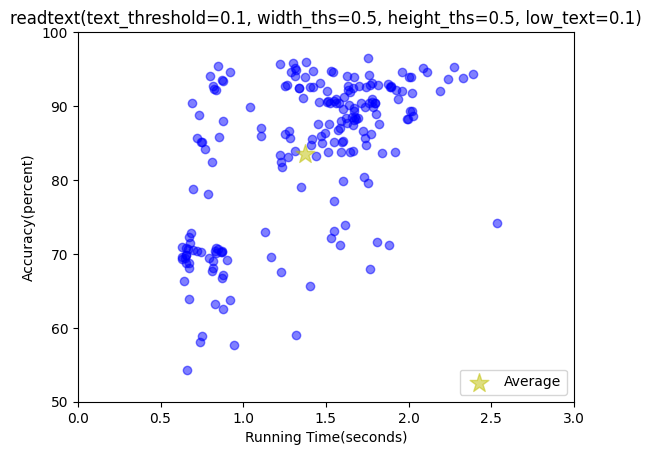

In [6]:
import easyocr
import json
import os
import time

import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 폴더 경로
folder_path_source = '2001_source'
folder_path_label = '2001_label'

# 폴더 안에 있는 모든 파일을 리스트 형태로 가져오기
file_list = os.listdir(folder_path_source)

# 파일 경로와 파일 이름 결합
file_paths = [os.path.join(folder_path_source, file_name) for file_name in file_list]

# 파일 수와 평균 경과 시간, 평균 정확도를 저장할 변수 초기화
file_count = len(file_paths)
total_elapsed_time = 0
total_accuracy = 0

'''
# 파일 개수 지정 (ex) 1개)
file_paths = file_paths[:1]
file_count = 1
'''

# easyocr 모델 로드
reader = easyocr.Reader(['ko','en'], gpu=True)

# 각 파일에 대해 OCR 수행
for file_path in file_paths:
    filename_split = os.path.splitext(os.path.basename(file_path))[0]
    print("파일명 :", os.path.basename(file_path))
    print("인식 실행 중")
    
    # 시작 시간 저장
    start_time = time.time()
    
    # OCR 인식 결과 추출
    result = reader.readtext(folder_path_source+"/"+filename_split+".jpg", text_threshold=0.1, width_ths=0.5, height_ths=0.5, low_text=0.1)
    
    # 인식 경과 시간 계산
    elapsed_time = time.time() - start_time
    
    # 총 경과 시간 계산
    total_elapsed_time += elapsed_time
    
    '''
    # 문자 인식 결과 출력
    print("")
    print("<EasyOCR 인식 결과>")
    print(result)
    
    print("")
    print("<EasyOCR 좌표 값 인덱싱>")
    # 좌표 값만 출력 (인덱싱)
    for i in result:
        print(i[0])
    '''
    
    # 라벨링 데이터(json) 파일 불러오기
    with open(folder_path_label+"/"+filename_split+".json", encoding="UTF8") as file:
        data = json.load(file)
        json_test = data['annotations']
        
        '''
        # 라벨링 데이터의 좌표 값만 출력
        print("")
        print("<라벨링 데이터>")
        for k in json_test:
            print(k['annotation.bbox'])
        '''
        
    # 인식 결과값과 라벨링 데이터 값 추출
    result_texts = {i[1] for i in result}
    json_test_texts = {k['annotation.text'] for k in json_test}
    
    result_list = []
    json_test_list = []
    matching_texts = []
        
    # 인식한 문자를 한 글자씩 분리
    for text_result in sorted(result_texts):
        result_list.extend(list(text_result))
    for text_json in sorted(json_test_texts):
        json_test_list.extend(list(text_json))
        
    '''
    # 분리 결과 출력
    print("")
    print("<인식한 문자 분리 결과>")
    print(result_list)
    print("[분리한 인식 문자] : 총 "+str(len(result_list))+"개")
    print("")
    print("<라벨링 문자 분리 결과>")
    print(json_test_list)
    print("[분리한 라벨링 문자] : 총 "+str(len(json_test_list))+"개")
    '''
    
    # 한 글자씩 비교하여 일치하는 값을 matching_texts 리스트에 저장
    for item in result_list:
        if item in json_test_list:
            matching_texts.append(item)
        
    '''
    # 일치 문자 출력
    print("")
    print("<일치 문자 결과>")
    print(matching_texts)
    print("[일치한 문자] : 총 "+str(len(matching_texts))+"개")
    print("")
    '''

    # 정확도 계산
    percentage = (len(matching_texts) / len(result_list)) * 100
    
    # 정확도, 경과 시간 출력
    if matching_texts:
        print("정확도 : {:.2f}%".format(percentage))
        print("경과 시간 : {:.2f}초".format(elapsed_time))
        total_accuracy += percentage
    else:
        print("정확한 인식 값이 없습니다.")
            
    print("")
    
    '''
    # 인식 결과 출력
    img = cv2.imread(folder_path_source+"/"+filename_split+".jpg")

    img = Image.fromarray(img)    # 이미지에 그리기 위해서 CV2 이미지를 PIL 이미지 객체로 변환
    draw = ImageDraw.Draw(img)

    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")

    for i in result :
        # 이미지 좌표 변수 지정
        x = i[0][0][0] 
        y = i[0][0][1] 
        w = i[0][1][0] - i[0][0][0] 
        h = i[0][2][1] - i[0][1][1]
    
        # 랜덤 색상 지정
        color_idx = random.randint(0,254)
        color = [int(c) for c in COLORS[color_idx]]

        # 이미지에 인식 영역 / 인식 문자 출력
        draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)

    plt.figure(figsize=(50,50))
    plt.imshow(img)
    plt.show()
    
    img.save('ResultImage_readtext/'+filename_split+'_result(readtext).jpg')  # JPG 형식으로 저장
    '''
    
    plt.scatter(x=[elapsed_time], y=[percentage], c='b', alpha=0.5, marker='o')

# 총 데이터 수 및 총 소요시간, 평균 경과 시간, 평균 정확도 계산
average_elapsed_time = total_elapsed_time / file_count
average_accuracy = total_accuracy / file_count
total_minutes = int(total_elapsed_time // 60)
total_seconds = int(total_elapsed_time % 60)

# 테스트 결과 출력
print("<테스트 총 결과>")
print("총 데이터 수 : "+str(file_count)+"개")
print("총 소요 시간 : "+str(total_minutes)+"분 "+str(total_seconds)+"초")
print("평균 인식 시간 : {:.2f}초".format(average_elapsed_time))
print("평균 정확도 : {:.2f}%".format(average_accuracy))

plt.scatter(x=[average_elapsed_time], y=[average_accuracy], s=200, c='y',alpha=0.5, marker='*', label='Average')
plt.title('readtext(text_threshold=0.1, width_ths=0.5, height_ths=0.5, low_text=0.1)')
plt.xlabel('Running Time(seconds)')
plt.ylabel('Accuracy(percent)')
plt.xlim(0, 3)
plt.ylim(50, 100)
plt.legend(loc='lower right')
plt.show()